# 欧度利方笔试2

> by **黄桥** (Qiao Huang) <job@qiaohuang.me>

**TOC:**

1. 准备工作
2. 数据预览
3. 数据清洗
4. 业务分析

## 1. 准备工作

In [1]:
# 准备第三方库，并简单设置

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

In [2]:
# 读取 CSV 文件，并生成 DataFrame

df_cube2 = pd.read_csv("面试数据2.csv", encoding='gbk',
                       dtype={'商品编号': str}, 
                       skiprows=4, # 跳过前 4 行数据说明
                       parse_dates=['开始日期', '结束日期'])

## 2. 数据预览

**预览总体信息和字段属性：**

In [3]:
df_cube2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   排序         33 non-null     int64         
 1   广告名称       33 non-null     object        
 2   状态         33 non-null     object        
 3   商品编号       33 non-null     object        
 4   广告类型       33 non-null     object        
 5   关键字/展示位置   33 non-null     object        
 6   开始日期       33 non-null     datetime64[ns]
 7   结束日期       33 non-null     object        
 8   浏览数        33 non-null     int64         
 9   点击数        33 non-null     int64         
 10  点击率        33 non-null     object        
 11  转化         33 non-null     int64         
 12  直接转化       33 non-null     int64         
 13  转化率        33 non-null     object        
 14  直接转化率      33 non-null     object        
 15  每一转化的成本    33 non-null     float64       
 16  每一直接转化的成本  33 non-null     float64       
 17 

我们发现：
1. 数据量较小，但字段较多。
2. 存在 11 个 `object` 字段，大部分和百分数有关。
3. 前 26 个字段无缺失值，后 3 列均为空值。

对应分析及后续处理：
#To-Do
1. [x] 为理解每个字段，预览全部列；因数据量较小，预览全部行。
2. [X] 对 `object` 字段中的百分数类，将其转换为 `float` 类型。
3. [ ] ~~对后 3 个空值列基于业务尝试填充。~~（缺少相关背景信息，暂无法填充。）

**数据总览：**

In [4]:
print("Data shape:", df_cube2.shape, "\n")

pd.set_option('display.max_columns', None)
df_cube2

Data shape: (33, 29) 



,排序,广告名称,状态,商品编号,广告类型,关键字/展示位置,开始日期,结束日期,浏览数,点击数,点击率,转化,直接转化,转化率,直接转化率,每一转化的成本,每一直接转化的成本,商品已出售,直接已售商品,销售金额,直接销售金额,花费,投资产出比,直接投资产出比,成本收入对比,直接成本收入对比,商品浏览数,商品点击数,商品点击率
0,1,Artificial Hanging Vine Weeping Willow Plastic...,进行中,8779009904\t,关联广告,ALL,2021-08-20 00:00:00,无限制,15256,672,4.40%,36,14,5.36%,2.08%,7.13,18.35,426,331,20180,13477,256.84,78.57,52.47,1.27%,1.91%,NaN,NaN,NaN
1,2,Artificial Hanging Ferns Plants Vine Fake Ivy ...,进行中,10618473470\t,商品搜索广告,ALL,2021-08-19 23:00:00,无限制,15034,410,2.73%,26,15,6.34%,3.66%,33.85,58.67,77,44,7839,5112,880.03,8.91,5.81,11.23%,17.21%,NaN,NaN,NaN
2,3,New Year Gift Artificial Eucalyptus Leaves St...,进行中,14007838087\t,关联广告,ALL,2022-05-22 00:00:00,无限制,11502,528,4.59%,17,3,3.22%,0.57%,20.97,118.84,51,10,3216,350,356.52,9.02,0.98,11.09%,101.86%,NaN,NaN,NaN
3,4,Artificial Hanging Ferns Plants Vine Fake Ivy ...,进行中,10618473470\t,关联广告,ALL,2021-08-20 00:00:00,无限制,11293,465,4.12%,28,15,6.02%,3.23%,6.29,11.73,138,51,11345,5895,175.99,64.46,33.50,1.55%,2.99%,NaN,NaN,NaN
4,5,"Artificial Plastic Eucalyptus Stems, Fake Gree...",进行中,16830193334\t,关联广告,ALL,2022-05-22 00:00:00,无限制,9837,444,4.51%,10,1,2.25%,0.23%,21.98,219.76,75,3,4051,195,219.76,18.43,0.89,5.42%,112.70%,NaN,NaN,NaN
5,6,Artificial Flowers Butterfly Long Stem Fake Or...,进行中,6394649512\t,商品搜索广告,ALL,2021-07-20 23:00:00,无限制,9761,165,1.69%,12,3,7.27%,1.82%,28.34,113.35,30,7,1696,301,340.05,4.99,0.89,20.05%,112.97%,NaN,NaN,NaN
6,7,Artificial Hanging Vine Weeping Willow Plastic...,进行中,8779009904\t,商品搜索广告,ALL,2021-08-19 23:00:00,无限制,9752,261,2.68%,6,3,2.30%,1.15%,116.22,232.44,106,103,4040,3889,697.32,5.79,5.58,17.26%,17.93%,NaN,NaN,NaN
7,8,"7cm Fake Sunflowers, Artificial Sunflower Head...",进行中,7394857526\t,关联广告,ALL,2022-05-22 00:00:00,无限制,8545,256,3.00%,7,3,2.73%,1.17%,71.15,166.02,11,4,883,366,498.07,1.77,0.73,56.41%,136.08%,NaN,NaN,NaN
8,9,110cm/Piece Artificial Fake Wisteria Vine Ratt...,进行中,9078931447\t,关联广告,ALL,2021-10-31 23:00:00,无限制,8184,171,2.09%,6,4,3.51%,2.34%,96.67,145.00,60,48,3066,2256,580.00,5.29,3.89,18.92%,25.71%,NaN,NaN,NaN
9,10,Artificial Rose Bud Silk Flowers Bush 22cm Lo...,进行中,9578164961\t,商品搜索广告,ALL,2021-08-19 23:00:00,无限制,6566,80,1.22%,3,3,3.75%,3.75%,70.75,70.75,20,20,740,740,212.25,3.49,3.49,28.68%,28.68%,NaN,NaN,NaN


我们发现：
- 数据是按照「浏览数」由大到小排列的。
- 「商品浏览数」是否就是页面「浏览数」，依此类推？暂无法得知更多信息，考虑将其去除。
- 除状态为「进行中」的记录，其他的都没有产生有效数据。为后续分析用户行为，考虑将其剔除。

**描述性统计信息进一步观察：**

In [5]:
df_cube2.describe(include='all')

,排序,广告名称,状态,商品编号,广告类型,关键字/展示位置,开始日期,结束日期,浏览数,点击数,点击率,转化,直接转化,转化率,直接转化率,每一转化的成本,每一直接转化的成本,商品已出售,直接已售商品,销售金额,直接销售金额,花费,投资产出比,直接投资产出比,成本收入对比,直接成本收入对比,商品浏览数,商品点击数,商品点击率
count,33.00000,33,33,33,33,33,33,33,33.000000,33.000000,33,33.000000,33.000000,33,33,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33,33,0.0,0.0,0.0
unique,NaN,23,3,23,2,1,13,2,NaN,NaN,24,NaN,NaN,15,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,NaN,NaN,NaN
top,NaN,Artificial Hanging Vine Weeping Willow Plastic...,进行中,8779009904\t,关联广告,ALL,2022-05-22 00:00:00,无限制,NaN,NaN,0.00%,NaN,NaN,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00%,0.00%,NaN,NaN,NaN
freq,NaN,2,24,2,23,33,8,32,NaN,NaN,10,NaN,NaN,19,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,20,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-10 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3773.787879,120.090909,NaN,5.303030,2.151515,NaN,NaN,16.720606,40.321818,32.272727,19.515152,1914.909091,1044.696970,150.430909,11.021818,4.488182,NaN,NaN,NaN,NaN,NaN
std,9.66954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4990.633156,184.972526,NaN,9.153158,4.243533,NaN,NaN,30.261532,68.038215,78.696122,60.017769,4134.728448,2677.214521,231.512770,24.827373,11.741282,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,9.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


我们发现：
- 「**广告名称**」和「**商品编号**」存在重复值，且两者 `unique` 值和 `freq` 值一致，恰巧与「**广告类型**」的 `unique` 值和`freq` 值相反。后续查看三者关系。
- 「关键字/展示位置」所有记录都为 ALL，在数据表中暂时没有分析意义，此列可去除。
- 「**开始日期**」最早于 2021-05-10，最晚于 2022-05-22，跨度超过一年但只有 13 个广告投放日期，且最多一天投放 8 次。可以分析频数。
- 「结束日期」只有最后一条记录有期限，此列可去除。

**查看重复值：**

In [6]:
# 传递参数 `keep=False`，筛选「广告名称+商品编号」所有重复值
# 并按「开始日期」排序展示

df_cube2[df_cube2.duplicated(subset=['广告名称', '商品编号'], keep=False)] \
        .sort_values(['广告名称', '商品编号', '开始日期'])

,排序,广告名称,状态,商品编号,广告类型,关键字/展示位置,开始日期,结束日期,浏览数,点击数,点击率,转化,直接转化,转化率,直接转化率,每一转化的成本,每一直接转化的成本,商品已出售,直接已售商品,销售金额,直接销售金额,花费,投资产出比,直接投资产出比,成本收入对比,直接成本收入对比,商品浏览数,商品点击数,商品点击率
25,26,9681340934\t,已结束,9681340934\t,商品搜索广告,ALL,2021-07-22 23:00:00,无限制,0,0,0.00%,0,0,0.00%,0.00%,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN,NaN
30,31,9681340934\t,已结束,9681340934\t,关联广告,ALL,2021-07-23 00:00:00,无限制,0,0,0.00%,0,0,0.00%,0.00%,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN,NaN
29,30,Artificial Daisies Flowers Outdoor 1 Bundles F...,暂停中,11618867838\t,商品搜索广告,ALL,2021-08-19 23:00:00,无限制,0,0,0.00%,0,0,0.00%,0.00%,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN,NaN
31,32,Artificial Daisies Flowers Outdoor 1 Bundles F...,暂停中,11618867838\t,关联广告,ALL,2021-08-20 00:00:00,无限制,0,0,0.00%,0,0,0.00%,0.00%,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN,NaN
5,6,Artificial Flowers Butterfly Long Stem Fake Or...,进行中,6394649512\t,商品搜索广告,ALL,2021-07-20 23:00:00,无限制,9761,165,1.69%,12,3,7.27%,1.82%,28.34,113.35,30,7,1696,301,340.05,4.99,0.89,20.05%,112.97%,NaN,NaN,NaN
22,23,Artificial Flowers Butterfly Long Stem Fake Or...,进行中,6394649512\t,关联广告,ALL,2021-07-21 00:00:00,无限制,69,0,0.00%,0,0,0.00%,0.00%,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN,NaN
12,13,Artificial Flowers Flocked Plastic Lavender We...,进行中,8481175050\t,商品搜索广告,ALL,2021-08-19 23:00:00,无限制,4066,124,3.05%,4,2,3.23%,1.61%,37.14,74.27,16,13,749,598,148.54,5.04,4.03,19.83%,24.84%,NaN,NaN,NaN
16,17,Artificial Flowers Flocked Plastic Lavender We...,进行中,8481175050\t,关联广告,ALL,2021-08-20 00:00:00,无限制,456,18,3.95%,0,0,0.00%,0.00%,0.00,0.00,0,0,0,0,6.30,0.00,0.00,0.00%,0.00%,NaN,NaN,NaN
1,2,Artificial Hanging Ferns Plants Vine Fake Ivy ...,进行中,10618473470\t,商品搜索广告,ALL,2021-08-19 23:00:00,无限制,15034,410,2.73%,26,15,6.34%,3.66%,33.85,58.67,77,44,7839,5112,880.03,8.91,5.81,11.23%,17.21%,NaN,NaN,NaN
3,4,Artificial Hanging Ferns Plants Vine Fake Ivy ...,进行中,10618473470\t,关联广告,ALL,2021-08-20 00:00:00,无限制,11293,465,4.12%,28,15,6.02%,3.23%,6.29,11.73,138,51,11345,5895,175.99,64.46,33.50,1.55%,2.99%,NaN,NaN,NaN


由上表可知：
- 「广告名称」和「商品编号」确实是一一对应关系。
- 「广告名称」+「商品编号」+「广告类型」可构成主键。每一种商品最多只有两种广告类型。
- 26 和 31 行「广告名称」未能正常显示，应排查 bug。
- 除最后一行，每种商品不同「广告类型」的「开始日期」都隔了一天，但只相差一个小时。因此后续可以用作对照实验比较不同类型广告。

**观察广告「开始日期」分布：**

In [7]:
# 先生成透视表
tb_ad_date = pd.pivot_table(df_cube2,
                            values='商品编号',
                            index='开始日期',
                            columns='广告类型',
                            aggfunc='count')

<AxesSubplot:xlabel='开始日期'>

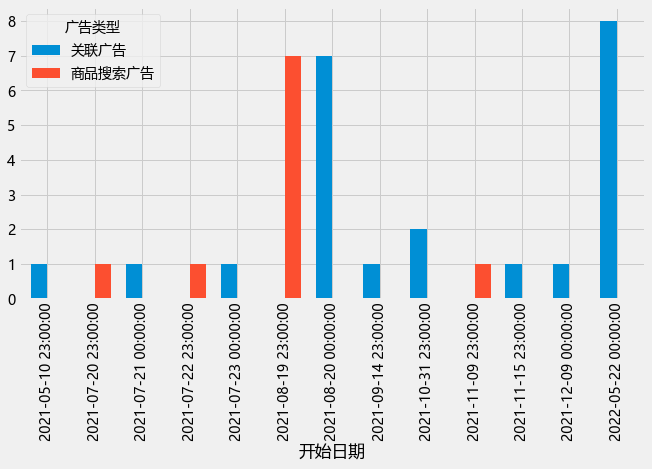

In [8]:
tb_ad_date.plot(kind="bar", width=0.7, figsize=(10, 5))

根据上面的柱形图发现：
- 红蓝色柱都是分散的，说明每一个开始日期都只投放一种类型的广告。
- 有些相邻色柱有成对出现的规律性，这验证了我们上面一条结论，即同一商品不同广告类型的投放时差只相差一小时，因此具有可比性。

## 3. 数据清洗

**初步清洗无效信息：**

In [9]:
# 去除后 3 列
cols_drop = ['商品浏览数', '商品点击数', '商品点击率']
df_droped = df_cube2.drop(columns=cols_drop)

# 剔除非「进行中」状态的后 9 行
df_removed = df_droped[df_droped['状态']=='进行中']

# 列出清洗后的前两行和后两行数据
df_removed.iloc[np.r_[0:2, -2:0]]

,排序,广告名称,状态,商品编号,广告类型,关键字/展示位置,开始日期,结束日期,浏览数,点击数,点击率,转化,直接转化,转化率,直接转化率,每一转化的成本,每一直接转化的成本,商品已出售,直接已售商品,销售金额,直接销售金额,花费,投资产出比,直接投资产出比,成本收入对比,直接成本收入对比
0,1,Artificial Hanging Vine Weeping Willow Plastic...,进行中,8779009904\t,关联广告,ALL,2021-08-20 00:00:00,无限制,15256,672,4.40%,36,14,5.36%,2.08%,7.13,18.35,426,331,20180,13477,256.84,78.57,52.47,1.27%,1.91%
1,2,Artificial Hanging Ferns Plants Vine Fake Ivy ...,进行中,10618473470\t,商品搜索广告,ALL,2021-08-19 23:00:00,无限制,15034,410,2.73%,26,15,6.34%,3.66%,33.85,58.67,77,44,7839,5112,880.03,8.91,5.81,11.23%,17.21%
22,23,Artificial Flowers Butterfly Long Stem Fake Or...,进行中,6394649512\t,关联广告,ALL,2021-07-21 00:00:00,无限制,69,0,0.00%,0,0,0.00%,0.00%,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.00%,0.00%
23,24,Artificial Lavender Flower For Wedding Decor A...,进行中,4895309738\t,关联广告,ALL,2021-08-20 00:00:00,无限制,21,2,9.52%,0,0,0.00%,0.00%,0.00,0.00,0,0,0,0,0.70,0.00,0.00,0.00%,0.00%


**对比值类字段数据进行百分数转换：**

In [10]:
percent_cols = ['点击率', '转化率', '直接转化率', '成本收入对比', '直接成本收入对比']

pd.options.mode.chained_assignment = None  # default='warn'

df_removed[percent_cols] = \
df_removed[percent_cols].apply(lambda x: x.str.rstrip("%").astype(float)/100)
df_removed[percent_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   点击率       24 non-null     float64
 1   转化率       24 non-null     float64
 2   直接转化率     24 non-null     float64
 3   成本收入对比    24 non-null     float64
 4   直接成本收入对比  24 non-null     float64
dtypes: float64(5)
memory usage: 1.1 KB


**屏蔽无用字段：**

In [11]:
# 经初步清洗后，还存在没有分析意义的字段，屏蔽之

cols_masked = ['排序', '状态', '关键字/展示位置', '结束日期']

df_revised = df_removed.drop(columns=cols_masked)
df_revised

,广告名称,商品编号,广告类型,开始日期,浏览数,点击数,点击率,转化,直接转化,转化率,直接转化率,每一转化的成本,每一直接转化的成本,商品已出售,直接已售商品,销售金额,直接销售金额,花费,投资产出比,直接投资产出比,成本收入对比,直接成本收入对比
0,Artificial Hanging Vine Weeping Willow Plastic...,8779009904\t,关联广告,2021-08-20 00:00:00,15256,672,0.0440,36,14,0.0536,0.0208,7.13,18.35,426,331,20180,13477,256.84,78.57,52.47,0.0127,0.0191
1,Artificial Hanging Ferns Plants Vine Fake Ivy ...,10618473470\t,商品搜索广告,2021-08-19 23:00:00,15034,410,0.0273,26,15,0.0634,0.0366,33.85,58.67,77,44,7839,5112,880.03,8.91,5.81,0.1123,0.1721
2,New Year Gift Artificial Eucalyptus Leaves St...,14007838087\t,关联广告,2022-05-22 00:00:00,11502,528,0.0459,17,3,0.0322,0.0057,20.97,118.84,51,10,3216,350,356.52,9.02,0.98,0.1109,1.0186
3,Artificial Hanging Ferns Plants Vine Fake Ivy ...,10618473470\t,关联广告,2021-08-20 00:00:00,11293,465,0.0412,28,15,0.0602,0.0323,6.29,11.73,138,51,11345,5895,175.99,64.46,33.50,0.0155,0.0299
4,"Artificial Plastic Eucalyptus Stems, Fake Gree...",16830193334\t,关联广告,2022-05-22 00:00:00,9837,444,0.0451,10,1,0.0225,0.0023,21.98,219.76,75,3,4051,195,219.76,18.43,0.89,0.0542,1.1270
5,Artificial Flowers Butterfly Long Stem Fake Or...,6394649512\t,商品搜索广告,2021-07-20 23:00:00,9761,165,0.0169,12,3,0.0727,0.0182,28.34,113.35,30,7,1696,301,340.05,4.99,0.89,0.2005,1.1297
6,Artificial Hanging Vine Weeping Willow Plastic...,8779009904\t,商品搜索广告,2021-08-19 23:00:00,9752,261,0.0268,6,3,0.0230,0.0115,116.22,232.44,106,103,4040,3889,697.32,5.79,5.58,0.1726,0.1793
7,"7cm Fake Sunflowers, Artificial Sunflower Head...",7394857526\t,关联广告,2022-05-22 00:00:00,8545,256,0.0300,7,3,0.0273,0.0117,71.15,166.02,11,4,883,366,498.07,1.77,0.73,0.5641,1.3608
8,110cm/Piece Artificial Fake Wisteria Vine Ratt...,9078931447\t,关联广告,2021-10-31 23:00:00,8184,171,0.0209,6,4,0.0351,0.0234,96.67,145.00,60,48,3066,2256,580.00,5.29,3.89,0.1892,0.2571
9,Artificial Rose Bud Silk Flowers Bush 22cm Lo...,9578164961\t,商品搜索广告,2021-08-19 23:00:00,6566,80,0.0122,3,3,0.0375,0.0375,70.75,70.75,20,20,740,740,212.25,3.49,3.49,0.2868,0.2868


清爽了不少。接下来我们可以进行业务洞察了。

## 4. 业务分析

**观察「销售金额」和「开始日期」的趋势：**

In [12]:
tb_sale_date = pd.pivot_table(df_revised,
                              values='销售金额',
                              index='开始日期',
#                               columns='广告类型',
                              aggfunc='sum')
tb_sale_date

,销售金额
开始日期,
2021-07-20 23:00:00,1696
2021-07-21 00:00:00,0
2021-08-19 23:00:00,13368
2021-08-20 00:00:00,31525
2021-10-31 23:00:00,3066
2021-12-09 00:00:00,215
2022-05-22 00:00:00,13322


作图分析：

<AxesSubplot:xlabel='开始日期'>

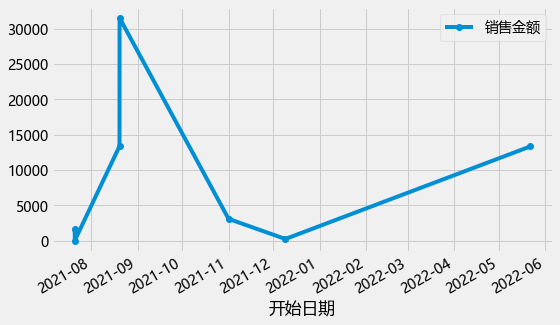

In [13]:
tb_sale_date.plot(style='-o', figsize=(8, 5))

可以看出有一年中有淡旺季交替。

**观察「销售金额」和「花费」的关系：**

<AxesSubplot:xlabel='销售金额', ylabel='花费'>

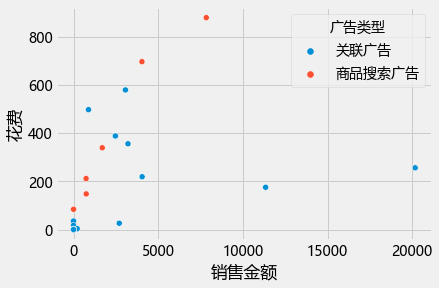

In [14]:
sns.scatterplot(data=df_revised, x="销售金额", y="花费", hue="广告类型")

由散点图可以发现两种趋势，对应两种「广告类型」，这说明「关联广告」的 ROI 要优于「商品广告」。

进一步可以借助**矩阵分析法**，通过两个维度矩阵发现问题，把样本分散到 4 个象限里。即
- 高销售金额、低花费：这类商品我们是否可以增加投入，做得更好？
- 高销售金额、高花费：能否保持住势头？
- 低销售金额、低成本：“鸡肋型”，是否可以丢弃？
- 低销售金额、高成本：到底出了什么问题？

**考察不同「广告类型」对指标的影响：**

由前面的分析得知，同一商品不同「广告类型」的数据有很好的对照性。

In [15]:
# 提取出具备两种广告类型的数据

df_compare = \
df_revised[df_revised.duplicated(subset=['广告名称', '商品编号'], keep=False)] \
        .sort_values(['广告名称', '商品编号', '开始日期'])

df_compare

,广告名称,商品编号,广告类型,开始日期,浏览数,点击数,点击率,转化,直接转化,转化率,直接转化率,每一转化的成本,每一直接转化的成本,商品已出售,直接已售商品,销售金额,直接销售金额,花费,投资产出比,直接投资产出比,成本收入对比,直接成本收入对比
5,Artificial Flowers Butterfly Long Stem Fake Or...,6394649512\t,商品搜索广告,2021-07-20 23:00:00,9761,165,0.0169,12,3,0.0727,0.0182,28.34,113.35,30,7,1696,301,340.05,4.99,0.89,0.2005,1.1297
22,Artificial Flowers Butterfly Long Stem Fake Or...,6394649512\t,关联广告,2021-07-21 00:00:00,69,0,0.0000,0,0,0.0000,0.0000,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.0000,0.0000
12,Artificial Flowers Flocked Plastic Lavender We...,8481175050\t,商品搜索广告,2021-08-19 23:00:00,4066,124,0.0305,4,2,0.0323,0.0161,37.14,74.27,16,13,749,598,148.54,5.04,4.03,0.1983,0.2484
16,Artificial Flowers Flocked Plastic Lavender We...,8481175050\t,关联广告,2021-08-20 00:00:00,456,18,0.0395,0,0,0.0000,0.0000,0.00,0.00,0,0,0,0,6.30,0.00,0.00,0.0000,0.0000
1,Artificial Hanging Ferns Plants Vine Fake Ivy ...,10618473470\t,商品搜索广告,2021-08-19 23:00:00,15034,410,0.0273,26,15,0.0634,0.0366,33.85,58.67,77,44,7839,5112,880.03,8.91,5.81,0.1123,0.1721
3,Artificial Hanging Ferns Plants Vine Fake Ivy ...,10618473470\t,关联广告,2021-08-20 00:00:00,11293,465,0.0412,28,15,0.0602,0.0323,6.29,11.73,138,51,11345,5895,175.99,64.46,33.50,0.0155,0.0299
6,Artificial Hanging Vine Weeping Willow Plastic...,8779009904\t,商品搜索广告,2021-08-19 23:00:00,9752,261,0.0268,6,3,0.0230,0.0115,116.22,232.44,106,103,4040,3889,697.32,5.79,5.58,0.1726,0.1793
0,Artificial Hanging Vine Weeping Willow Plastic...,8779009904\t,关联广告,2021-08-20 00:00:00,15256,672,0.0440,36,14,0.0536,0.0208,7.13,18.35,426,331,20180,13477,256.84,78.57,52.47,0.0127,0.0191
13,Artificial Lavender Flower For Wedding Decor A...,4895309738\t,商品搜索广告,2021-08-19 23:00:00,1592,43,0.0270,0,0,0.0000,0.0000,0.00,0.00,0,0,0,0,29.22,0.00,0.00,0.0000,0.0000
23,Artificial Lavender Flower For Wedding Decor A...,4895309738\t,关联广告,2021-08-20 00:00:00,21,2,0.0952,0,0,0.0000,0.0000,0.00,0.00,0,0,0,0,0.70,0.00,0.00,0.0000,0.0000


总共有 7 组对照数据。我们来比较分析。

首先比较「**点击率**」：

In [16]:
df_ctr_no = pd.pivot_table(df_compare,
                     values='点击率',
                     index='商品编号',
                     columns='广告类型',
                     aggfunc='mean')
df_ctr_no

广告类型,关联广告,商品搜索广告
商品编号,,
10618473470\t,0.0412,0.0273
4895309738\t,0.0952,0.0270
6394649512\t,0.0000,0.0169
8481175050\t,0.0395,0.0305
8779009904\t,0.0440,0.0268
9479532169\t,0.0260,0.0136
9578164961\t,0.0206,0.0122


绘图分析：

<AxesSubplot:xlabel='商品编号'>

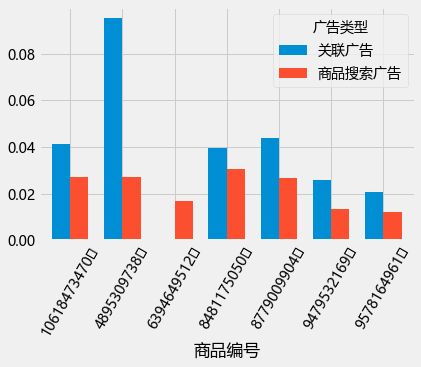

In [18]:
df_ctr_no.plot(kind='bar', width=0.7, rot=60)

由柱状对比图可以得知，关联广告「点击率」全面优于商品搜索广告。  
（`6394649512`「关联广告」点击率为零可能是因为「浏览数」太小了。）

比较「**投资产出比**」：

In [19]:
df_roi_no = pd.pivot_table(df_compare,
                     values='投资产出比',
                     index='商品编号',
                     columns='广告类型',
                     aggfunc='mean')
df_roi_no

广告类型,关联广告,商品搜索广告
商品编号,,
10618473470\t,64.46,8.91
4895309738\t,0.00,0.00
6394649512\t,0.00,4.99
8481175050\t,0.00,5.04
8779009904\t,78.57,5.79
9479532169\t,0.00,0.00
9578164961\t,0.00,3.49


由表直接可以看出，`10618473470` 和 `8779009904` 商品的「投资产出比」特别突出，而又以其「关联广告」类型尤其突出。

**最后，我来看一下各个指标之间的相关性：**

<AxesSubplot:>

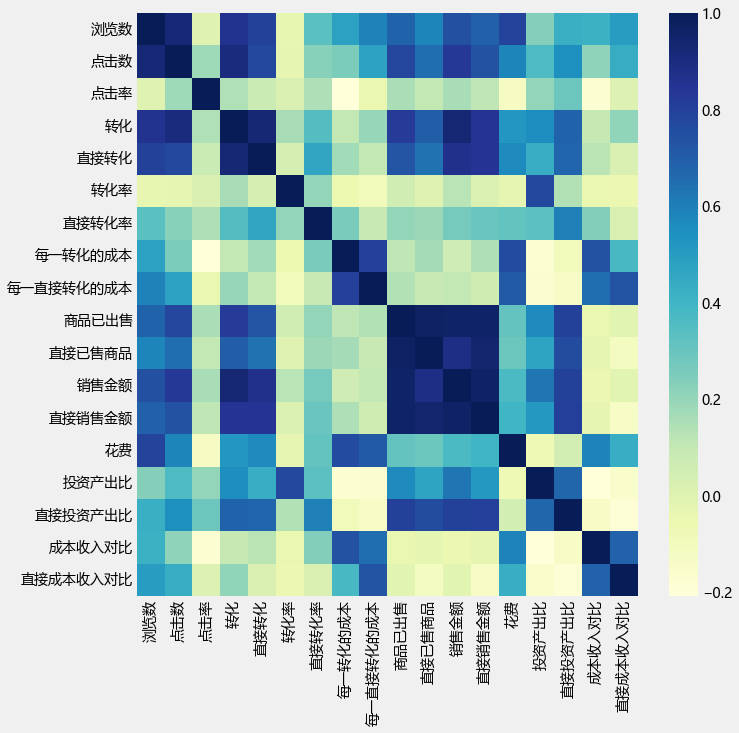

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_revised.corr(), cmap='YlGnBu')

由相关性热力图发现：
- 相比「直接投资产出比」，「投资产出比」更依赖于「转化率」，而「直接转化率」最能影响「直接投资产出比」这个指标。
- ROI 更大程度上取决于「转化率」，相关系数接近 0.8，有较强的正相关性。
- 而想要提升「转化率」从而提高 ROI，可以从「直接转化率」入手。
- 并不是「花费」越多，ROI 就越好，反而会加大「成本收入对比」，因此考虑是否存在广告费用边际效用递减的情形。

好了，就先到这里了。

因时间限制，我不能进行更多维度的分析。  
因数据量限制，我不能运用机器学习方法。

但随着业务的熟练和技术水平的提高，我相信会更加得心应手的——我的 ROI (单位时间产出) 会更高。

Thanks for reading ;)